## Obyƒçejn√© diferenci√°ln√≠ rovnice


In [ ]:
!python -m pip install scipy

In [ ]:
!python -m pip install sympy

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sympy

## Mo≈ænosti ≈ôe≈°en√≠
symbolicky
- sympy.dsolve

numericky
- scipy.integrate.solve_ivp
- scipy.integrate.odeint
- vlastn√≠ metody (Euler, ...)

≈òe≈°me rovnici $$dy/dt=-3y$$ s poƒç√°teƒçn√≠ podm√≠nkou $y(0)=1$

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Definice rovnice (ƒçemu je rovno dy/dt)
def dydt(t, y):
    return -3 * y

# Poƒç√°teƒçn√≠ podm√≠nky
y0 = [1]

# ƒåasov√Ω interval
t_span = (0, 5)
t = np.linspace(0, 5, 100)

scipy.integrate.solve_ivp

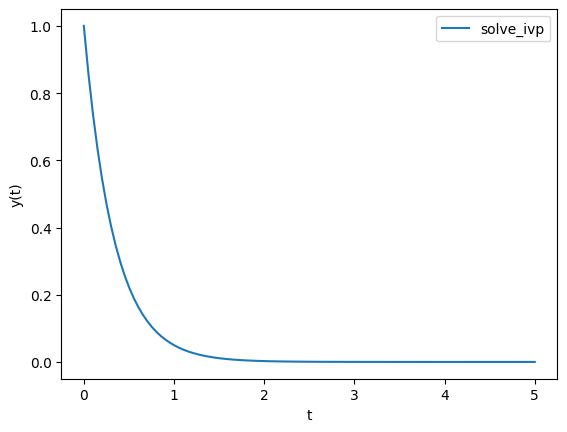

In [15]:
# ≈òe≈°en√≠ pomoc√≠ solve_ivp
from scipy.integrate import solve_ivp
solution = solve_ivp(dydt, t_span, y0, t_eval=t)

# Vykreslen√≠
plt.plot(solution.t, solution.y[0], label='solve_ivp')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


In [ ]:
# ≈òe≈°en√≠ pomoc√≠ odeint
from scipy.integrate import odeint

# Definice rovnice (ƒçemu je rovno dy/dt)
def dydt(y, t):         # jin√° definice - nutno p≈ôehodit t a y!
    return -3 * y

solution_odeint = odeint(dydt, y0, t)

# Vykreslen√≠
plt.plot(t, solution_odeint, label='odeint', color='red')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


In [20]:
from sympy import Function, dsolve, Derivative, Eq, symbols
from sympy.abc import t

y = Function('y')
ode = Eq(Derivative(y(t), t), -3 * y(t))

# Symbolick√© ≈ôe≈°en√≠
solution_symbolic = dsolve(ode, ics={y(0): 1})
print(solution_symbolic)


Eq(y(t), exp(-3*t))


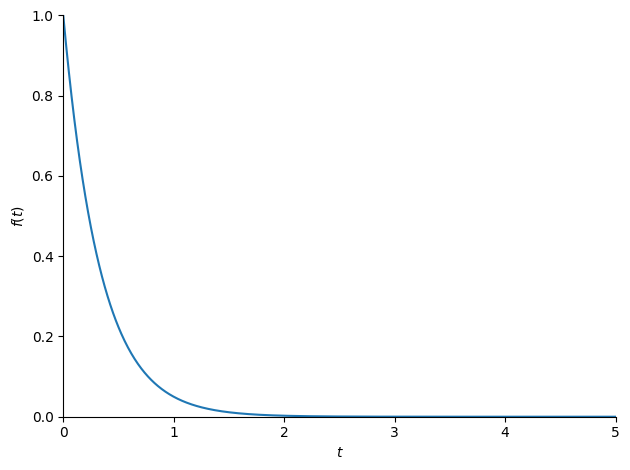

In [29]:
#from sympy import plot
from sympy.plotting import plot
#plot(solution_symbolic)                            # rychl√© vykreslen√≠
p = plot(solution_symbolic, (t, 0, 5), show=False)  # Omezen√≠ na interval t od 0 do 5
p.xlim = (0, 5)  # Nastaven√≠ meze pro osu x
p.ylim = (0, 1)  # Nastaven√≠ meze pro osu y
p.show()

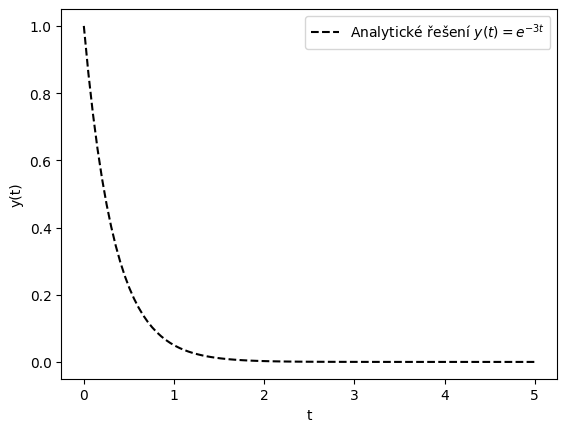

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify
from sympy.abc import t

# Symbolick√© ≈ôe≈°en√≠
solution_symbolic = solution_symbolic.rhs  # pouze prav√° strana (y(t))

# P≈ôevod na funkci
y_function = lambdify(t, solution_symbolic, 'numpy')

# ƒåasov√© hodnoty pro vykreslen√≠
t_values = np.linspace(0, 5, 100)

# Vypoƒçten√≠ y(t)
y_values = y_function(t_values)

# Vykreslen√≠
plt.plot(t_values, y_values, label='Analytick√© ≈ôe≈°en√≠ $y(t) = e^{-3t}$', color='black', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


In [41]:
# Eulerova metoda
h = 0.1  # krok
t_euler = np.arange(0, 5, h)
y_euler = np.zeros(len(t_euler))
y_euler[0] = 1  # poƒç√°teƒçn√≠ podm√≠nka

# Aproximace ≈ôe≈°en√≠
for i in range(1, len(t_euler)):
    y_euler[i] = y_euler[i-1] + h * (-3 * y_euler[i-1])

# Vykreslen√≠
plt.plot(t_euler, y_euler, label='Eulerova metoda', color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


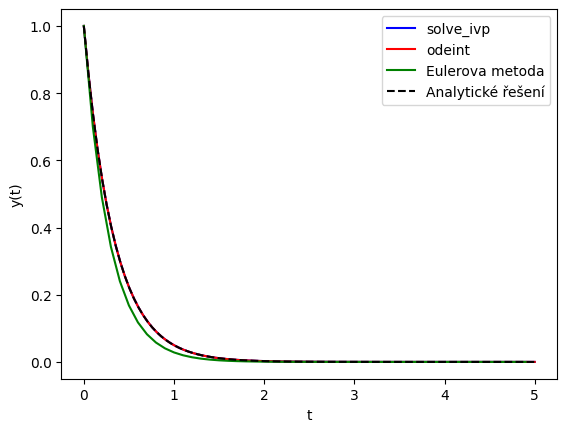

In [42]:
plt.plot(solution.t, solution.y[0], label='solve_ivp', color='blue')
plt.plot(t_values, solution_odeint, label='odeint', color='red')
plt.plot(t_euler, y_euler, label='Eulerova metoda', color='green')
plt.plot(t_values, np.exp(-3*t_values), label='Analytick√© ≈ôe≈°en√≠', color='black', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


#### Cviƒçen√≠ - ≈ôe≈°en√≠ rovnice
Vy≈ôe≈°te rovnici 

$$ y^{\prime} = x; ~~y(x_0) = 2,x_0 = 0$$

pomoc√≠ 

- symbolick√© matematiky,
- vybran√© numerick√© metody (jednokrokov√©),
- vybran√© vestavƒõn√© funkce softwaru (nap≈ô. *integrate*).


Porovnejte jednotliv√° ≈ôe≈°en√≠ z hlediska implementace, rychlosti a p≈ôesnosti ≈ôe≈°en√≠.

rovnice: Eq(Derivative(y(x), x), x)
≈ôe≈°en√≠:  Eq(y(x), x**2/2 + 2)
rhs:     x**2/2 + 2


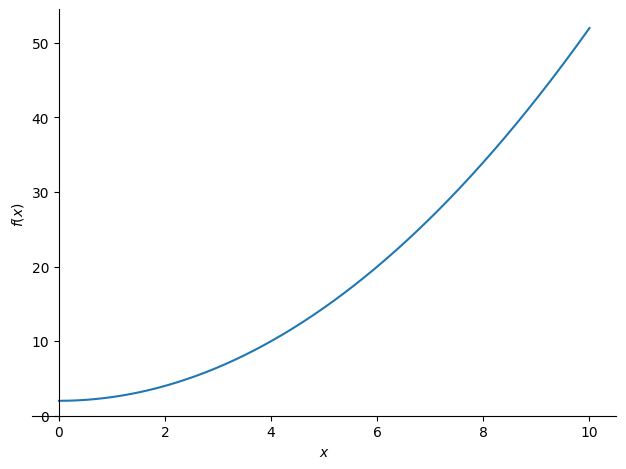

In [2]:
# symbolick√© ≈ôe≈°en√≠ (y'= x)
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

x = symbols('x')                                        # definice symbol≈Ø
y = symbols('y', cls=Function)                          # y=Function('y')

eq = Eq(y(x).diff(x), x)                                # y' = x
print("rovnice:", eq)
sol = dsolve(eq, hint='1st_linear', ics={y(0): 2})      # metoda, mno≈æina poƒç√°teƒçn√≠ch podm√≠nek (y(0) = 2)
#                line√°rn√≠ 1. ≈ô√°du, initial conditions

print("≈ôe≈°en√≠: ", sol)
print("rhs:    ", sol.rhs)                              # prav√° strana (right hand side)
plot(sol.rhs, (x,0,10))                                 # graf pomoc√≠ sympy

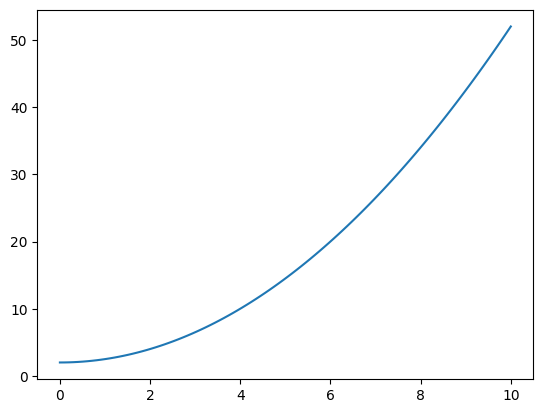

In [3]:
# vykreslen√≠ analytick√©ho ≈ôe≈°en√≠ (y'= x) pomoc√≠ matplotlib
from sympy import lambdify
f = lambdify(x, sol.rhs, "numpy")       # p≈ôevod funkce sympy -> numpy (symbol, v√Ωraz, modul)

xn = np.linspace(0, 10, 100)
yn = f(xn)
plt.plot(xn, yn)
plt.show()

Explicitn√≠ Eulerova metoda

$ùë¶^{ùëñ+1}=ùë¶^{ùëñ}+ùëì(ùë•^ùëñ,ùë¶^ùëñ)\Delta x$, $\quad$ ≈ôe≈°√≠me rovnici $y'= x$


x:[0 1 2 3 4 5 6 7 8 9]
y:[ 2.  2.  3.  5.  8. 12. 17. 23. 30. 38.]


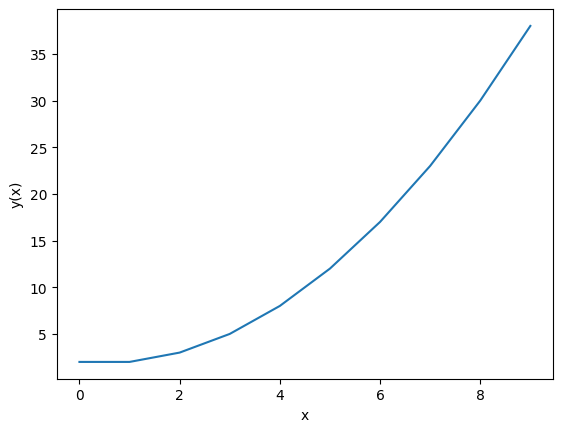

In [7]:
# ≈ôe≈°en√≠ rovnice (y'= x) Eulerovou metodou pomoc√≠ vlastn√≠ho k√≥du 
def odeEuler(f, y0, x):
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0,len(x)-1):
        y[i+1] = y[i] + f(y[i],x[i])*(x[i+1] - x[i])
    return y

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)

f = lambda y, x: x                      # funkce y a x, vrac√≠ x (rovnice y'= x)
# print(f(1,2))

def funkce(y, x):                       # tot√©≈æ
    return x

y = odeEuler(f, y0, x)                  # (funkce, poƒç. bod, pole x)

print(f"x:{x}\ny:{y}")                  # pole x a pole y
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

Knihovna scipy - odeint
- Ordinary Differential Equation

x:[0 1 2 3 4 5 6 7 8 9]
y:[[ 2.        ]
 [ 2.50000001]
 [ 4.00000001]
 [ 6.50000001]
 [10.00000001]
 [14.50000001]
 [20.00000001]
 [26.50000001]
 [34.00000001]
 [42.50000001]]


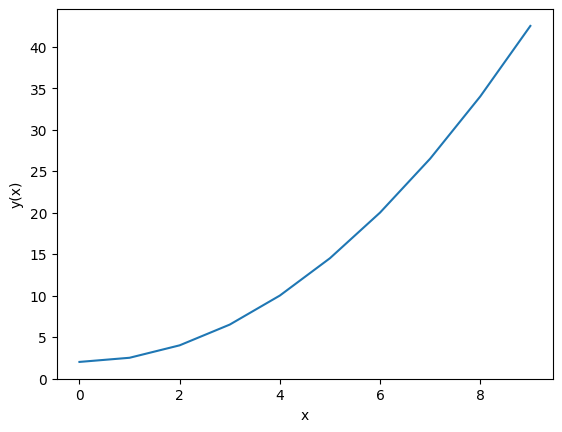

In [4]:
# numericky pomoc√≠ scipy
from scipy.integrate import odeint

f = lambda y, x: x                      # funkce y a x, vrac√≠ x (rovnice y'= x)
#def f(y, x):                           # tot√©≈æ
#    return x

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)
y = odeint(f, y0, x)                    # funkce, poƒç. bod, pole x

print(f"x:{x}\ny:{y}")
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

≈òe≈°te diferenci√°ln√≠ rovnici $$\frac{dy}{dt}=-yt+13$$ pomoc√≠ scipy.integrate.odeint

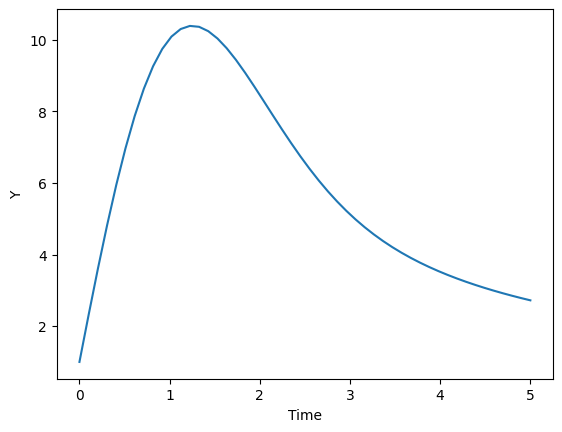

In [5]:
# numericky pomoc√≠ scipy
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
  
def returns_dydt(y,t):  # vrac√≠ pravou stranu ODE (derivaci), parametry aktu√°ln√≠ stav syst√©mu a ƒças
    dydt = -y * t + 13
    return dydt 

y0 = 1                              # poƒç√°teƒçn√≠ podm√≠nka 
  
t = np.linspace(0,5)                # hodnoty ƒçasu
  

y = odeint(returns_dydt, y0, t)     # ≈ôe≈°en√≠ ODE 
  

plt.plot(t,y)                       # vykreslen√≠ v√Ωsledk≈Ø 
plt.xlabel("Time") 
plt.ylabel("Y") 
plt.show()


≈òe≈°te n√°sleduj√≠c√≠ soustavu diferenci√°ln√≠ch rovnic:
$$\frac{dx}{dt}=‚àíy$$
$$\frac{dy}{dt}=x$$


In [6]:
# numericky pomoc√≠ scipy
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# uva≈æujme U = [x,y]
def system(U, t):               # vrac√≠ prav√© strany obou ODE, odpov√≠d√° dU/dt
    dxdt = -U[1]                # 1. rovnice            dx/dt = -y
    dydt = U[0]                 # 2. rovnice            dy/dt = x
    return [dxdt, dydt]

U0 = [1.0, 0.0]                 # poƒç√°teƒçn√≠ podm√≠nky    x = 1, y = 0

t = np.linspace(0, 10, 100)     # ƒçasov√Ω rozsah

sol = odeint(system, U0, t)     # ≈ôe≈°en√≠ soustavy (syst√©m, poƒç. podm√≠nky, pole nez. promƒõnn√©)

# vykreslen√≠ v√Ωsledk≈Ø
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.xlabel('ƒças')
plt.ylabel('hodnota')
plt.legend(loc='best')
plt.title('≈òe≈°en√≠ soustavy diferenci√°ln√≠ch rovnic')
plt.grid()
plt.show()


#### Cviƒçen√≠ - v√Ωtok vody otvorem
M√°me n√°dobu s vodou, kter√° m√° otvor na dnƒõ. 

P≈ôedpokl√°dejme, ≈æe voda z otvoru vyt√©k√° rychlost√≠ √∫mƒõrnou mno≈æstv√≠ vody v l√°hvi. 

Mno≈æstv√≠ vody v l√°hvi se postupnƒõ sni≈æuje, co≈æ znamen√°, ≈æe rychlost, kterou voda vyt√©k√°, se tak√© sni≈æuje.

Eq(V(t), 10*exp(-0.1*t))


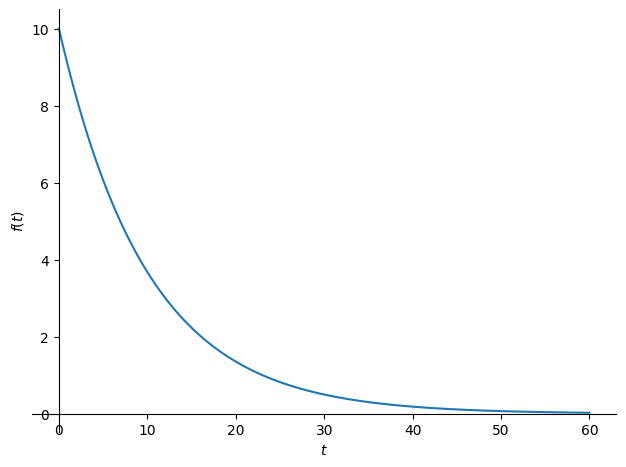

In [7]:
# pomoc√≠ sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t = symbols('t')
k = symbols("k")
V = Function("V")                       # nezn√°m√° fce
k = 0.1
eq = Eq(V(t).diff(t), -k*V(t))          # rovnice dV/dt = -kV
sol = dsolve(eq, ics={V(0): 10})        # nutno zadat poƒç√°teƒçn√≠ podm√≠nku (zkuste, co se stane bez jej√≠ho zad√°n√≠)
print(sol)
plot(sol.rhs,(t,0,60))

Jak se z√°vislost zmƒõn√≠, pokud konstanta k bude m√≠t jin√© znam√©nko?

#### Cviƒçen√≠ - Verhulst≈Øv populaƒçn√≠ model
Vy≈ôe≈°te n√°sleduj√≠c√≠ diferenci√°ln√≠ rovnici pomoc√≠ symbolick√© a numerick√© matematiky.
$$\frac{{\rm d} N(t)}{{\rm d}t} = rN(t)\left( 1 - \frac{N(t)}{K} \right)$$
kde $r=2$ a $K=50$ jsou konstanty (specifick√° m√≠ra r≈Østu populace a horn√≠ hranice populace). 

Uva≈æujte poƒç√°teƒçn√≠ podm√≠nku $N(0) = 1$


Eq(N(t), 50/(1 + 49*exp(-2*t)))


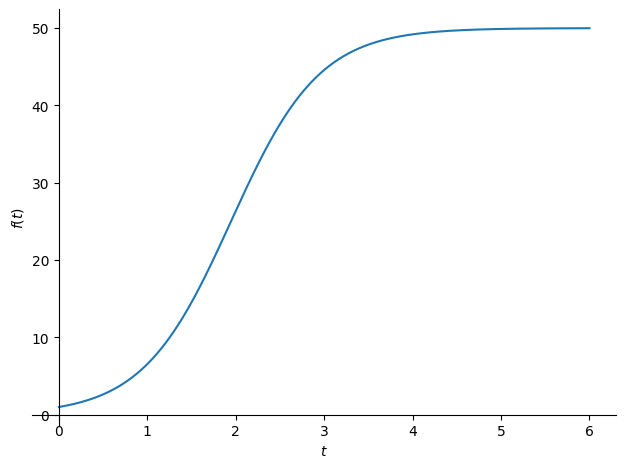

In [8]:
# pomoc√≠ sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t = symbols('t')
r, K = symbols('r K', integers=True)
N = symbols('N', cls=Function)

r = 2
K = 50

eq = Eq(N(t).diff(t), r*N(t)*(1-N(t)/K))
sol = dsolve(eq, ics={N(0): 1})                 # N(0) = 1

print(sol)
plot(sol.rhs,(t,0,6))

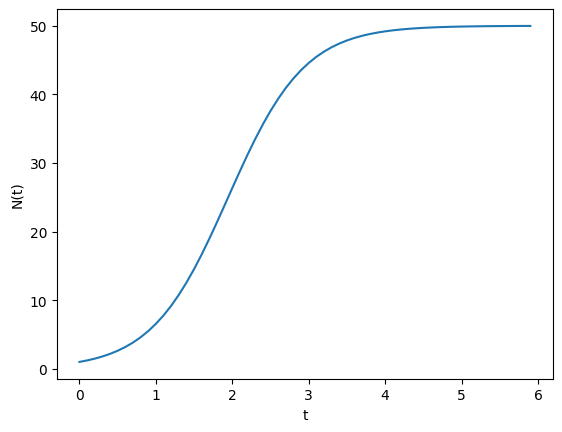

In [9]:
# numericky pomoc√≠ scipy
from scipy.integrate import odeint

def model(N, t, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

t0 = 0
N0 = 1
tmax = 6
dt = 0.1
r = 2
K = 50

t = np.arange(t0, tmax, dt)
N = odeint(model, N0, t, args=(r, K))

plt.plot(t,N)
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()

#### Cviƒçen√≠ - Nucen√© kmit√°n√≠
Vy≈ôe≈°te n√°sleduj√≠c√≠ soustavu diferenci√°ln√≠ rovnici pomoc√≠ symbolick√© a numerick√© matematiky.

$$
\begin{align}
\frac{{\rm d} x}{{\rm d}t} = & v \\
\frac{{\rm d} x}{{\rm d}t} = & -\omega x - \beta\frac{{\rm d} x}{{\rm d}t} - F_0\sin(\Omega t)
\end{align}
$$
kde $\omega=1$, $\beta=0.05$, $F_0=2.0$ a $\Omega=0.63$.

Uva≈æujte poƒç√°teƒçn√≠ podm√≠nky jsou $x=3.0$, $v=0.0$.


Eq(x(t), (-2.00483019553968*sin(0.99968745115661*t) + 3.17273436804693*cos(0.99968745115661*t))*exp(-0.025*t) + 3.30717769425721*sin(0.63*t) - 0.172734368046928*cos(0.63*t))


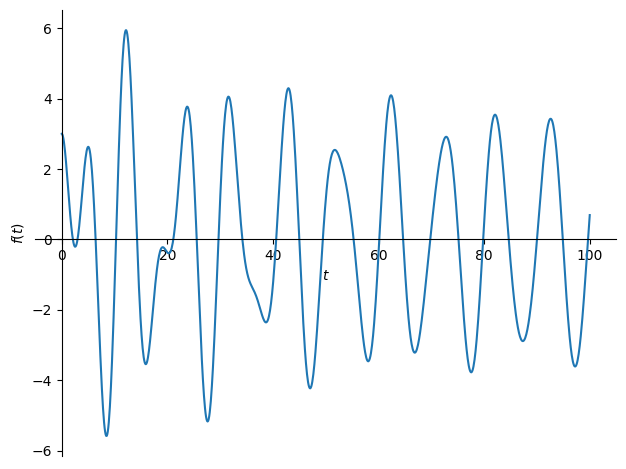

In [10]:
# analytick√© ≈ôe≈°en√≠ - sympy
import sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t, omega, beta, Omega, F0 = symbols('t omega beta Omega F0')
x = symbols('x', cls=Function)

x0 = 3.0            # poƒç. v√Ωchylka
v0 = 0.0            # poƒç. rychlost
omega = 1.0         # vlastn√≠ √∫hl. frekvence (ƒçtverec)
beta = 0.05         # tlumen√≠
Omega = 0.63        # bud√≠c√≠ √∫hl. frekvence
F0 = 2.0            # bud√≠c√≠ amplituda

# x"  = - omega*x - beta*x' - F0*sympy.sin(Omega*t)
v = Eq(x(t).diff(t, t), -omega*x(t) -beta*x(t).diff(t) + F0*sympy.sin(Omega*t))

#  initial/boundary condition set: slovn√≠k, kl√≠ƒç nez√°visle promƒõnn√°
#y1 = dsolve(v, ics={x(0): x0, x(1): v0})
ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0}
y = dsolve(v, ics=ics)     

print(y)
plot(y.rhs,(t,0,100))

[[ 3.          0.        ]
 [ 2.98521775 -0.29275528]
 [ 2.94195581 -0.56857137]
 ...
 [ 0.26986584  2.13980006]
 [ 0.4824494   2.10619889]
 [ 0.69124841  2.06424118]]


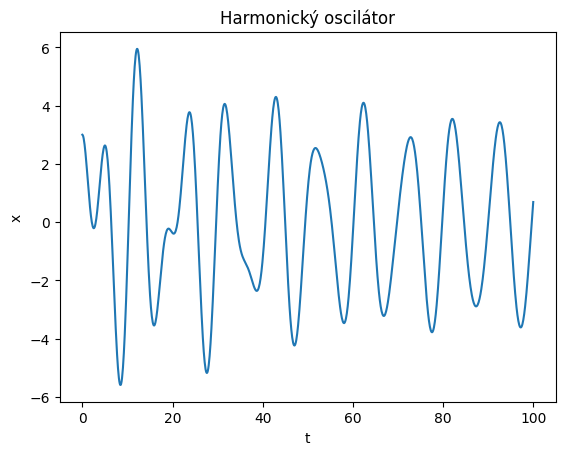

In [11]:
# numerick√© ≈ôe≈°en√≠ - scipy a matplotlib
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def tlumene_kmitani(x0, v0, omega, beta, Omega, F0):

    # x' = v
    # v' = a  = - omega*x - beta*x' - F0*sympy.sin(Omega*t)
    def dUdt(U, t, omega, beta, Omega, F0):     # vrac√≠ [v, a]
        # U[0] = x
        # U[1] = v = dx/dt
        return [U[1], -omega*U[0] - beta*U[1] + F0*np.sin(Omega*t)]
    # U je dvojice [x, v]
    U0 = [x0, v0]
    t = np.linspace(0, 100, 1000)           # vektor nez√°visle promƒõnn√©
    args=(omega, beta, Omega, F0)
                                            # parametry odeint: funkce, poƒç. bod, pole t
    U = odeint(dUdt, U0, t, args=args)      # funkce vrac√≠ [v=dx/dt, a=dv/dt=d2x/dt2]
    print(U)
    x = U[:,0]                              # z√≠sk√°n√≠ x v dan√Ωch ƒçasech z nasƒç√≠tan√Ωch v=dx/dt

    plt.xlabel("t")
    plt.ylabel("x")
    plt.title("Harmonick√Ω oscil√°tor")
    plt.plot(t, x)

# omega = uhlova frekvence vlastniho kmitani
# beta = utlum vlastniho kmitani
# Omega = uhlova frekvence budici sily
# F0 = amplituda budici sily
# x0 = pocatecni vychylka vlastniho kmitani
# v0 = pocatecni rychlost vlastniho kmitani
tlumene_kmitani(x0=3.0, v0=0.0, omega=1.0, beta=0.05, Omega=0.63, F0=2.0)

[[ 0.          1.        ]
 [ 0.099933    0.99499417]
 [ 0.19886552  0.98002679]
 ...
 [-0.66773898  0.74439758]
 [-0.59000649  0.80740042]
 [-0.50636706  0.86231984]]


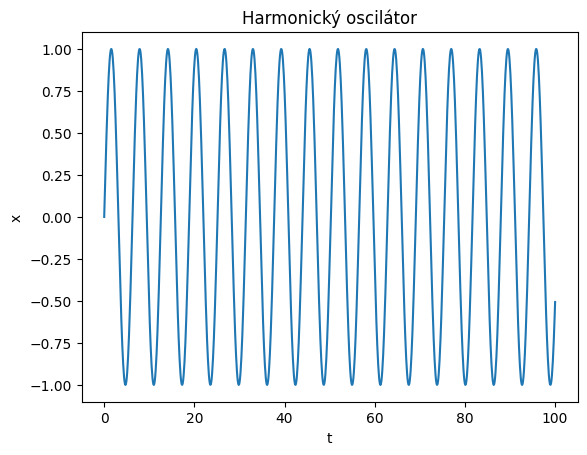

In [12]:
# netlumene kmitani (oscilator nenarazi do molekul prostredi a neztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.0, F0=0.0)

[[ 0.          1.        ]
 [ 0.0994345   0.98506738]
 [ 0.1968881   0.96047051]
 ...
 [-0.00514637  0.00471824]
 [-0.00465154  0.00515951]
 [-0.0041153   0.00554499]]


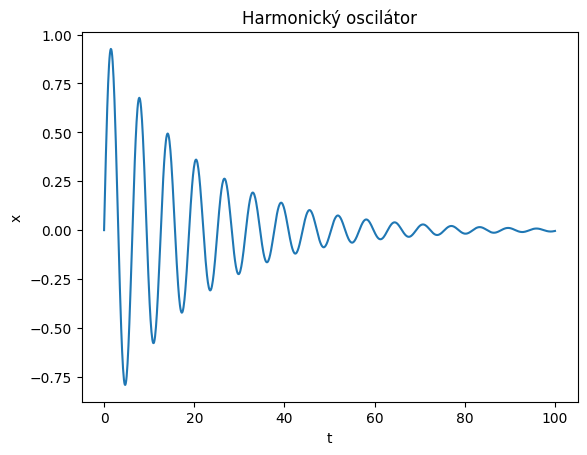

In [13]:
# tlumene kmitani nebuzene (oscilator narazi do molekul prostredi a ztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.1, Omega=0.0, F0=0.0)

[[  0.           1.        ]
 [  0.10010001   0.99999567]
 [  0.20019749   0.99993309]
 ...
 [-38.14693468 -32.57564422]
 [-41.2145753  -28.66333208]
 [-43.87549136 -24.45597556]]


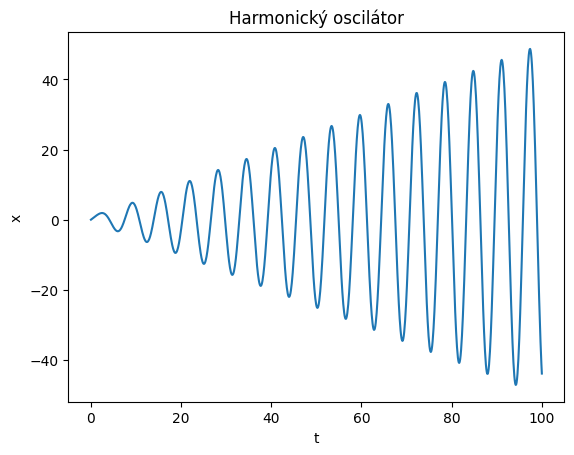

In [14]:
# netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od synchronizovane budici sily)
# rezonance
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=1.0, F0=1.0)

[[ 0.          1.        ]
 [ 0.09998313  0.99649581]
 [ 0.19926585  0.98601695]
 ...
 [-1.54157186  0.53020132]
 [-1.48584862  0.58227407]
 [-1.42518257  0.62889123]]
[[ 0.          1.        ]
 [ 0.10003325  0.99799744]
 [ 0.19966618  0.99200711]
 ...
 [-2.41540427  0.31600388]
 [-2.3816904   0.35714648]
 [-2.34399785  0.39546137]]


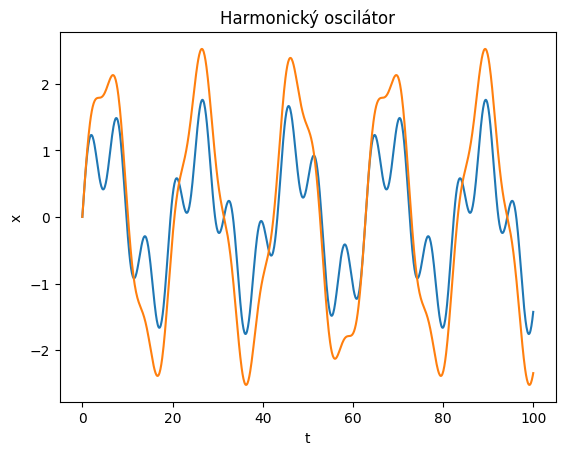

In [15]:
#netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od nesynchronizovane budici sily)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.3, F0=1.0)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.3, F0=2.0)

#### Cviƒçen√≠ - Vektorov√© pole
Zobrazte jednotliv√° ≈ôe≈°en√≠ n√°sleduj√≠c√≠ch rovnic pomoc√≠ vektorov√©ho pole.
$$
\begin{align*}
  y^{\prime} =& x + y\\
  y^{\prime} =& -\frac{x}{y}\\
  y^{\prime} =& \frac{y^2}{x}
\end{align*}
$$


- Zvolte ≈ôe≈°en√≠ $(x,y)$ v rozsahu $(-5,5)$
  - tj. specifikujeme hodnoty y pro x=0, pro kter√© chceme ≈ôe≈°en√≠ naj√≠t
- Pro ≈ôe≈°en√≠ rovnic zvolte numerickou nebo symbolickou matematiku
- Vyznaƒçte ≈ôe≈°en√≠, kter√© vyhovuje v√°mi vybran√Ωm poƒç√°teƒçn√≠m podm√≠nk√°m



In [16]:
# y' = x + y
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)                      # nastaven√≠ mƒõ≈ô√≠tka x
plt.ylim(xymin, xymax)                      # nastaven√≠ mƒõ≈ô√≠tka y

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)          # pole x
y0s = [-5, -3, 0, 3, 5]                     # konkr√©tn√≠ ics v <-5, 5> (hodnoty y pro x = 0)
xs = symbols('x_sym')
ys = symbols('y_sym', cls=Function)
eq = Eq(ys(xs).diff(xs), xs + ys(xs))       # y' = x + y

# vykreslen√≠ konkr√©tn√≠ch ≈ôe≈°en√≠ 
for y0 in y0s:                              # p≈ôes jednotliv√© ics
    sol = dsolve(eq, ics={ys(0): y0})       # ≈ôe≈°√≠me rovnici s konkr√©tn√≠ poƒç√°teƒçn√≠ podm√≠nkou
    print(f"y0:{y0}", sol)
    y = lambdify(xs, sol.rhs)               # p≈ôevede symbolickou funkci na numpy
    plt.plot(x, y(x), "r-")                 # ≈ôe≈°en√≠ pro ka≈ædou poƒç. podm√≠nku (ƒçervenƒõ)
    plt.text(0, y(0), f'y0 = {y0}', fontsize=8, color='red', ha='right')

# vektorov√© pole
nvec_on_row = 10                            # poƒçet ≈°ipek na ≈ô√°dku
# pozice ≈°ipek (v obou smƒõrech x,y stejn√Ω poƒçet)
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))

U = 1                                       # smƒõr doprava
V = X + Y                                   # y' = x + y (y' je rychlost)
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)                         # 2D pole ≈°ipek: X, Y um√≠stƒõn√≠ ≈°ipek, U, V smƒõry

plt.show()

y0:-5 Eq(y_sym(x_sym), -x_sym - 4*exp(x_sym) - 1)
y0:-3 Eq(y_sym(x_sym), -x_sym - 2*exp(x_sym) - 1)
y0:0 Eq(y_sym(x_sym), -x_sym + exp(x_sym) - 1)
y0:3 Eq(y_sym(x_sym), -x_sym + 4*exp(x_sym) - 1)
y0:5 Eq(y_sym(x_sym), -x_sym + 6*exp(x_sym) - 1)


In [17]:
# y' = -x/y
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 1, 3, 5]
x_sym = symbols('x_sym')
y_sym = symbols('y_sym', cls=Function)
eq = Eq(y_sym(x_sym).diff(x_sym), -x_sym/y_sym(x_sym))
for y0 in y0s:
    sol = dsolve(eq, ics={y_sym(0): y0})
    print(f"y0:{y0}", sol)
    y = lambdify(x_sym, sol.rhs)
    plt.plot(x, y(x), "r-")
    plt.text(0, y(0), f'y0 = {y0}', fontsize=8, color='red', ha='right')

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = -X/Y
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

y0:-5 Eq(y_sym(x_sym), -sqrt(25 - x_sym**2))
y0:-3 Eq(y_sym(x_sym), -sqrt(9 - x_sym**2))


<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(9 - x_sym**2)


y0:1 Eq(y_sym(x_sym), sqrt(1 - x_sym**2))


<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(1 - x_sym**2)


y0:3 Eq(y_sym(x_sym), sqrt(9 - x_sym**2))


<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(9 - x_sym**2)


y0:5 Eq(y_sym(x_sym), sqrt(25 - x_sym**2))


Eq(y(x), -1/(C1 + log(x)))
Eq(y(x), -1/(log(x) - 1))


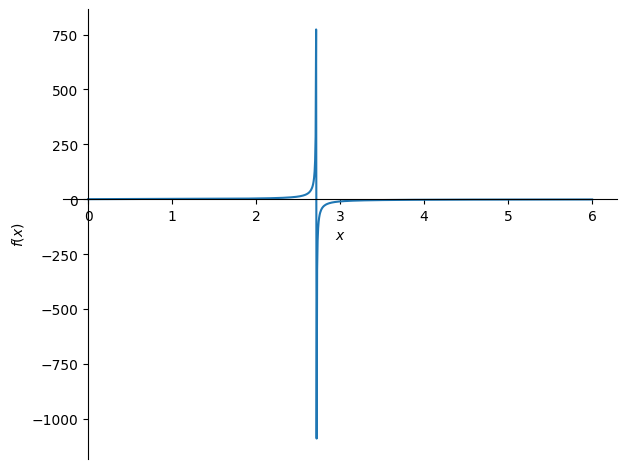

y0:0.1 Eq(y(x), -1/(log(x) - 10.0))
y0:3 Eq(y(x), -1/(log(x) - 1/3))
y0:5 Eq(y(x), -1/(log(x) - 1/5))


<lambdifygenerated-22>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 10.0)
<lambdifygenerated-23>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 1/3)
<lambdifygenerated-24>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 1/5)


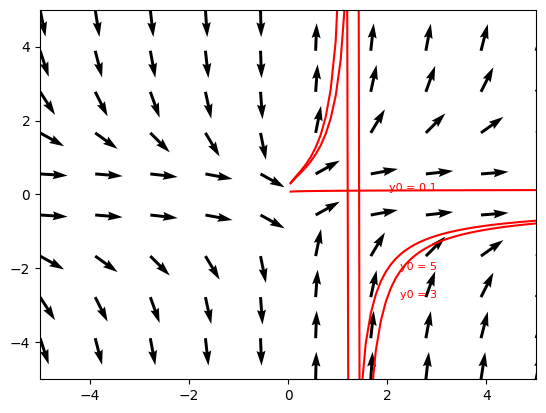

In [18]:
# y' = y^2/x
from sympy import symbols, Function, dsolve, lambdify
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')
y = Function('y')(x)

eq = y.diff(x) - y**2/x

solution = dsolve(eq, y)
print(solution)
sol = dsolve(eq, y, ics={y.subs(x, 1): 1})
print(sol)
plot(sol.rhs, (x, 0.0001, 6))

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)                      # nastaven√≠ mƒõ≈ô√≠tka x
plt.ylim(xymin, xymax)                      # nastaven√≠ mƒõ≈ô√≠tka y

xn = np.linspace(xymin, xymax, 100)          # pole x
y0s = [0.1, 3, 5]                     # konkr√©tn√≠ ics v <-5, 5> (hodnoty y pro x = 0)


for y0 in y0s:
    sol = dsolve(eq, y, ics={y.subs(x, 1): y0})
    print(f"y0:{y0}", sol)
    yn = lambdify(x, sol.rhs)
    plt.plot(xn, yn(xn), "r-")
    plt.text(3, yn(2), f'y0 = {y0}', fontsize=8, color='red', ha='right')

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = Y*Y/X
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

C:\Users\P\AppData\Local\Temp\ipykernel_11704\101118710.py:21: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y = odeint(model, y0, x)


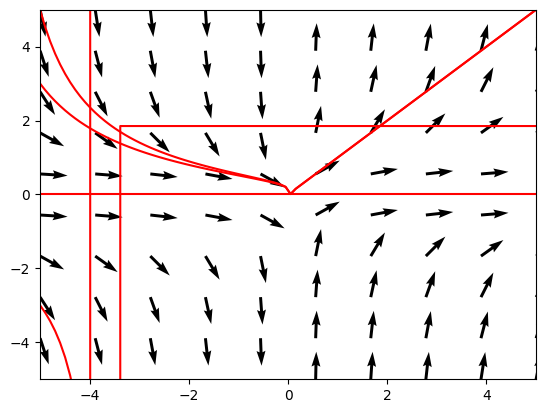

In [22]:
# y' = y^2/x
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# sympy √∫plnƒõ sel≈æe p≈ôi ≈ôe≈°en√≠ t√©to rovnice :)

def model(y, x):
    dydx = y**2/x
    return dydx

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

# ≈ôe≈°en√≠ diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 0, 3, 5]
for y0 in y0s:
    y = odeint(model, y0, x)
    #print(y)
    plt.plot(x, y, "r-")

# vektorov√© pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = Y**2/X
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

#### Eulerova metoda
≈ôe≈°√≠me rovnici $y'=0.05y$

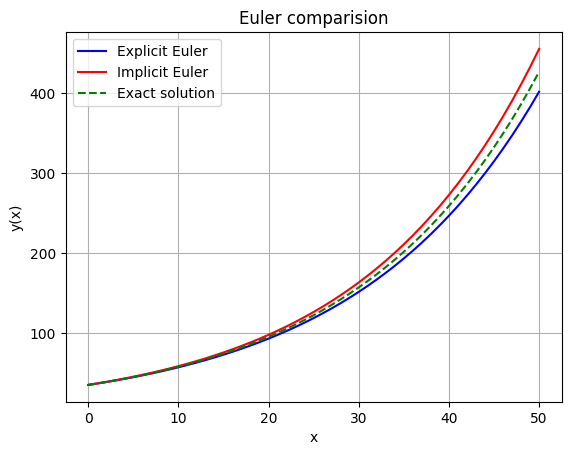

In [23]:
# numericky pomoc√≠ vlastn√≠ho k√≥du
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, xmin, xmax, dx, y0, label):       # funkce, od, do, dx, y0, popis
    x = np.arange(xmin, xmax+dx, dx)
    yexpl = np.zeros(len(x))
    yexpl[0] = y0
    for i in range(0, len(x) - 1):
        yexpl[i+1] = yexpl[i] + dx*f(x[i], yexpl[i])
    plt.plot(x, yexpl, 'b-', label=label)
    return yexpl
    

def implicit_euler(f, xmin, xmax, dx, y0, label):

    def fixed_point_iteration(f, yi, xi_next, dx, niterations):
        yi_next = yi
        for i in range(niterations):
            yi_next = yi + dx*f(xi_next, yi_next)
        return yi_next

    x = np.arange(xmin, xmax+dx, dx)
    yimpl = np.zeros(len(x))
    yimpl[0] = y0
    for i in range(0, len(x) - 1):
        yi_next = fixed_point_iteration(f, yimpl[i], x[i+1], dx, 10) # = yimpl[i+1] aprox
        yimpl[i+1] = yimpl[i] + dx*f(x[i+1], yi_next)
    plt.plot(x, yimpl, 'r-', label=label)
    return yimpl

def presne(xmin, xmax, dx, y0, label):
    x = np.arange(xmin, xmax+dx, dx)
    y = y0*np.exp(0.05*x)
    plt.plot(x, y, 'g--', label=label)


explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")
presne(xmin=0, xmax=50, dx=1, y0=35, label="Exact solution")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

#### Cviƒçen√≠ - Euler
<font color="green">U n√°sleduj√≠c√≠ rovnice nejd≈ô√≠ve odvoƒète a pot√© aplikujte implicitn√≠ i explicitn√≠ Eulerovu metodu. 

Postupnƒõ zmƒõ≈àte krok *h* a sledujte p≈ôesnost a stabilitu obou metod, nap≈ô. pomoc√≠ glob√°ln√≠ chyby. 

Poƒç√°teƒçn√≠ podm√≠nka je</font> $\color{green} y(0) = y_0 = 0$.

$$y^{\prime} = -100y + 100$$


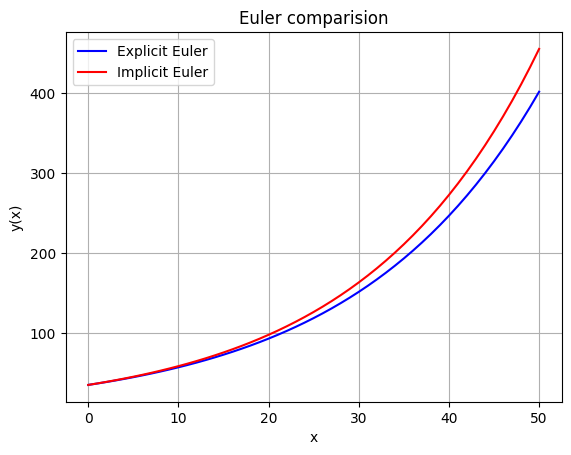

In [24]:
explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

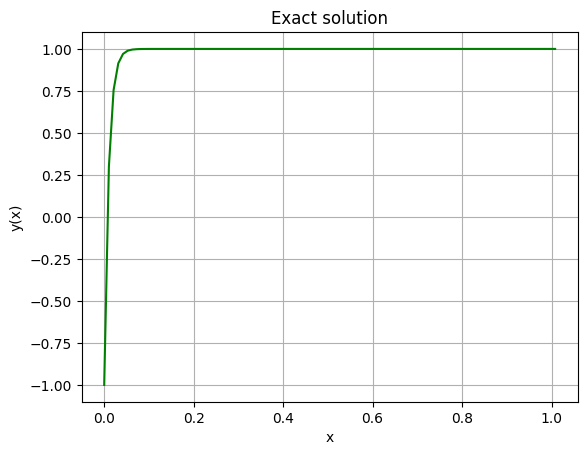

In [25]:
# p≈ôesn√© ≈ôe≈°en√≠
xmin=0
xmax=1
dx=0.0105

x = np.arange(xmin, xmax+dx, dx)
f_exact = lambda x: 1 - 2*np.exp(-100*x)
y_exact = f_exact(x)

plt.plot(x, y_exact, 'g-')

plt.title('Exact solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.1718665216162698


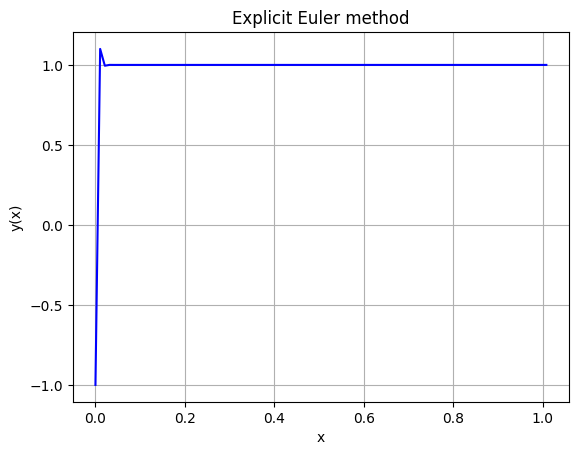

In [26]:
# Euler (explicitn√≠)
y_expl = explicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_expl)))

plt.title('Explicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.7876131253665077


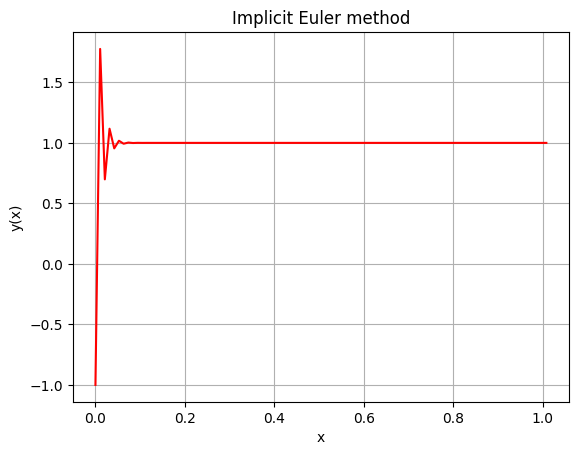

In [27]:
# Euler implicitn√≠
y_impl = implicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_impl)))

plt.title('Implicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Stiff ODE solver

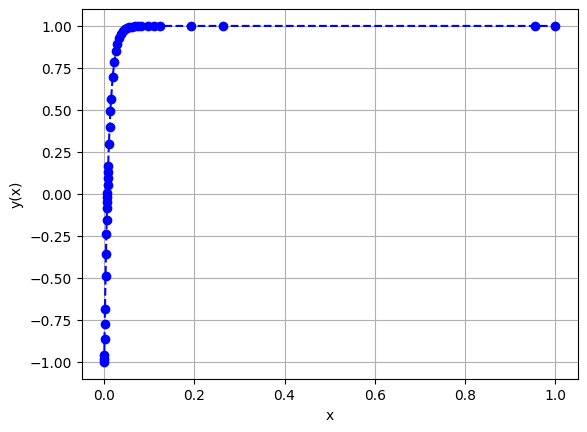

In [28]:
# numericky pomoc√≠ scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def model(x, y):
    return -100*y + 100

y0 = -1
xmin = 0
xmax = 1

sol = solve_ivp(model, [xmin, xmax], [y0], method='BDF', first_step =0.0001, dense_output=True)
#print(sol)

plt.plot(sol.t, sol.y[0], 'bo--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Cviƒçen√≠ - Stiff
<font color="green">U n√°sleduj√≠c√≠ soustavy rovnic nejd≈ô√≠ve vypoƒç√≠tejte jej√≠ koeficient tuhosti a pot√© pomoc√≠ implicitn√≠ a explicitn√≠ Eulerovy metody soustavu vy≈ôe≈°te. 

Poƒç√°teƒçn√≠ podm√≠nky jsou </font> $\color{green}y(0) = y_0 = 0$ <font color="green">a</font> $\color{green}z(0) = z_0 = 0$.
\begin{align*}
  y^{\prime} &=&998y + 1998z \\
  z^{\prime} &=-&999y - 1999z 
\end{align*}


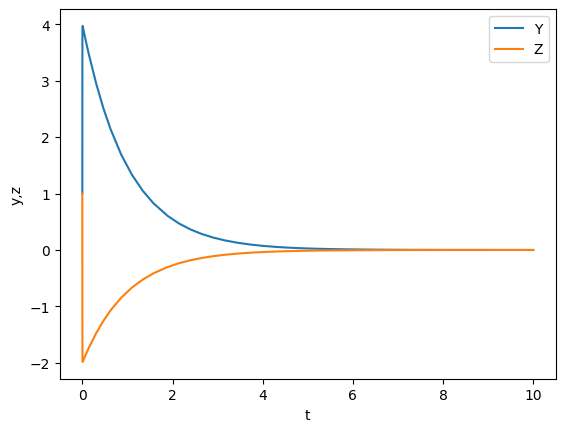

In [29]:
# numericky pomoc√≠ scipy
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def deriv(t, k):
    y, z = k
    dy = 998*y + 1998*z
    dz = -999*y - 1999*z
    return dy, dz

xmin, xmax = 0, 10

y0 = 1
z0 = 1
k = y0, z0

soln = solve_ivp(deriv, (xmin, xmax), k, method='BDF', first_step =0.0001, dense_output=True)

plt.plot(soln.t, soln.y[0], label='Y')
plt.plot(soln.t, soln.y[1], label='Z')
plt.xlabel('t')
plt.ylabel('y,z')
plt.legend()
plt.show()

#### Fyzik√°ln√≠ model - ochlazov√°n√≠ tƒõlesa

Za jak dlouho se ochlad√≠ kovov√© tƒõleso z poƒç√°teƒçn√≠ teploty $T_t^0 = 120^\circ$ C na koneƒçnou teplotu $T_f = 30^\circ$ C, jestli≈æe je tƒõleso obklopeno vzduchem s $T_p = 20^\circ$ C? 

Oh≈ôev okoln√≠ho vzduchu neuva≈æujeme.


- Rozmƒõry tƒõlesa:
 
  - $a=0.1~m,~b=0.05~m,~c=0.01~m$.
  - $A = 0.013~m^2$.
  - $V = 5\cdot10^{-5}~m^3$.

- Koeficient p≈ôestupu tepla $h = 0.85~W/(m^2K)$.
- Tepeln√° kapacita $C = 0.175~J/K$.
- Urƒç√≠me konstantu $B =\frac{hA}{C} = 0.06~s^1$.


$ùëëùëá_ùë°/ùëëùë°=‚àíùêµ (ùëá_ùë°‚àíùëá_ùëù)$

In [30]:
# Definice konstant
T_p = 20    # Teplota okol√≠ [¬∞C]
T_f = 30    # Koneƒçn√° teplota tƒõlesa [¬∞C]
T_0 = 120   # Poƒç√°teƒçn√≠ teplota tƒõlesa [¬∞C]
B = 0.06    # Konstanta z Newtonova z√°kona ochlazov√°n√≠ [1/s]

# D√©lka kroku
dt = 0.1  # [s]


In [31]:
# V√Ωpoƒçet ƒçasu pomoc√≠ Eulerovy metody
t = 0       # Inicializace ƒçasu, teploty a poƒçtu krok≈Ø
T = T_0
steps = 0

# Eulerova metoda pro numerick√© ≈ôe≈°en√≠ diferenci√°ln√≠ rovnice
while T > T_f:
    dTdt = -B * (T - T_p)
    T += dTdt * dt
    t += dt
    steps += 1

# V√Ωsledky
print(f"Tƒõleso se ochlad√≠ na {T_f}¬∞C za {t:.2f} sekund ({steps} krok≈Ø).")


Tƒõleso se ochlad√≠ na 30¬∞C za 38.30 sekund (383 krok≈Ø).


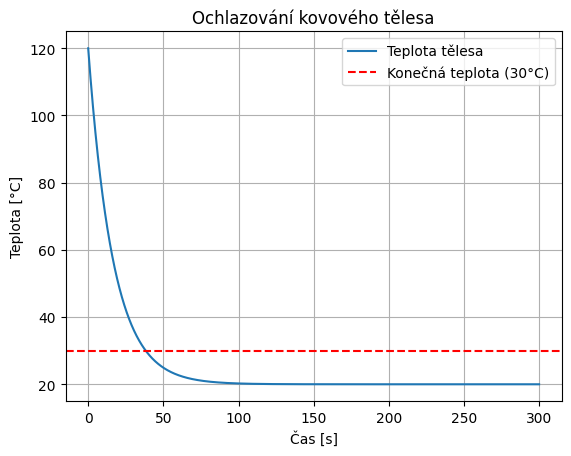

In [32]:
# Vykreslen√≠ grafu pomoc√≠ Eulerovy metody (stejn√° √∫loha, ulozen√≠ do pole)
import numpy as np
import matplotlib.pyplot as plt

t_max = 300     # Maxim√°ln√≠ ƒças [s]

# Vytvo≈ôen√≠ pole ƒças≈Ø
times = np.arange(0, t_max, dt)

# Inicializace pole teplot (pro vykreslen√≠)
temperatures = np.zeros_like(times)
temperatures[0] = T_0

# Eulerova metoda pro v√Ωpoƒçet teploty
for i in range(1, len(times)):
    dTdt = -B * (temperatures[i-1] - T_p)             # dTdt = -B * (T - T_p)
    temperatures[i] = temperatures[i-1] + dTdt * dt   # T += dTdt * dt

# Vykreslen√≠ v√Ωvoje teploty v ƒçase
plt.plot(times, temperatures, label='Teplota tƒõlesa')
plt.xlabel('ƒåas [s]')
plt.ylabel('Teplota [¬∞C]')
plt.title('Ochlazov√°n√≠ kovov√©ho tƒõlesa')
plt.axhline(T_f, color='red', linestyle='--', label=f'Koneƒçn√° teplota ({T_f}¬∞C)')
plt.legend()
plt.grid(True)
plt.show()


Eq(T(t), C1*exp(-0.06*t) + 20.0)

Eq(T(t), 20.0 + 100.0*exp(-0.06*t))

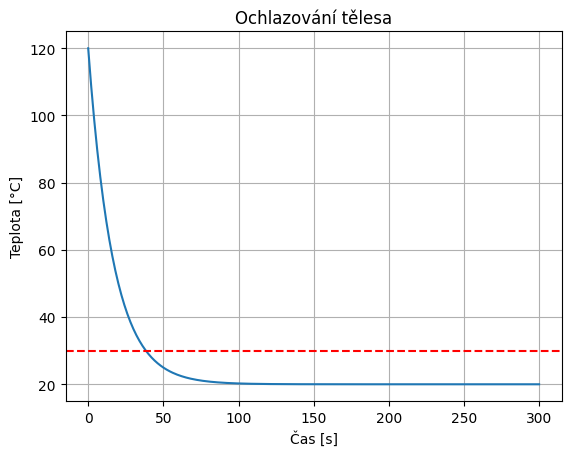

20.0 + 100.0*exp(-0.06*t)

≈òe≈°en√≠ diferenci√°ln√≠ rovnice:


[38.3764182165674,
 38.3764182165674 - 104.71975511966*I,
 38.3764182165674 + 104.71975511966*I]

In [33]:
# Pomoc√≠ symbolick√© matematiky (stejn√° √∫loha)
import sympy as sp

# Definice symbolick√Ωch promƒõnn√Ωch
t = sp.symbols('t')
T = sp.Function('T')(t)

# Definice diferenci√°ln√≠ rovnice
diffeq = sp.Eq(sp.Derivative(T, t), -B * (T - T_p))

# ≈òe≈°en√≠ diferenci√°ln√≠ rovnice
g_solution = sp.dsolve(diffeq, T)                           # ≈ôe≈°en√≠ bez poƒç. podm√≠nky
display(g_solution)
solution = sp.dsolve(diffeq, ics={T.subs(t,0): T_0})        # nutno zadat poƒç√°teƒçn√≠ podm√≠nku
display(solution)

# Vytvo≈ôen√≠ funkce pro teplotu
T_func = sp.lambdify(t, solution.rhs, 'numpy')

# V√Ωpoƒçet teploty pro dan√© ƒçasy
times = np.linspace(0, 300, 300)  # ƒçasy v sekund√°ch
temperatures = T_func(times)

# Vykreslen√≠ v√Ωsledk≈Ø
import matplotlib.pyplot as plt

plt.plot(times, temperatures)
plt.xlabel('ƒåas [s]')
plt.ylabel('Teplota [¬∞C]')
plt.title('Ochlazov√°n√≠ tƒõlesa')
plt.axhline(T_f, color='red', linestyle='--', label=f'Koneƒçn√° teplota ({T_f}¬∞C)')
plt.grid(True)
plt.show()

# V√Ωpoƒçet ƒçasu
display(solution.rhs)
equation = sp.Eq(solution.rhs, T_f)
# Vy≈ôe≈°en√≠ rovnice pro t
solution = sp.solve(equation, t)

# V√Ωpis ≈ôe≈°en√≠
print("≈òe≈°en√≠ diferenci√°ln√≠ rovnice:")
display(solution)


#### Chemick√Ω model - chemick√° kinetika
Chemick√° kinetika popisuje rychlost chemick√© reakce komponent a popisuje z√°vislost rychlosti reakce na parametrech a podm√≠nk√°ch, p≈ôi kter√Ωch prob√≠h√°. 

Jde nap≈ô√≠klad o poƒçet molekul $n$, kter√© se reakce √∫ƒçastn√≠, objem ve kter√©m, se reakce odehr√°v√° $V$ nebo ƒças $t$, po kter√Ω reakce prob√≠h√°.

Rychlost reakce $v$ se d√° vyj√°d≈ôit jako zmƒõna poƒçtu mol≈Ø l√°tky $\Delta n$ v objemu $V$ za ƒças $t$.

$$v =\frac{|\Delta n|}{V\Delta t} \rightarrow \lim_{\Delta t \rightarrow 0} \frac{|\Delta n|}{V\Delta t} = \left| \frac{{\rm d} n}{ V{\rm d} t} \right|$$

Pokud je $V = konst$, lze rovnici p≈ôepsat do tvaru

$$\frac{{\rm d}n}{V{\rm d}t} = \frac{{\rm d}c}{{\rm d}t} \rightarrow \frac{{\rm d}n}{V} = {\rm d}c$$

kde $c$ je koncentrace l√°tky v ƒçase $t$.

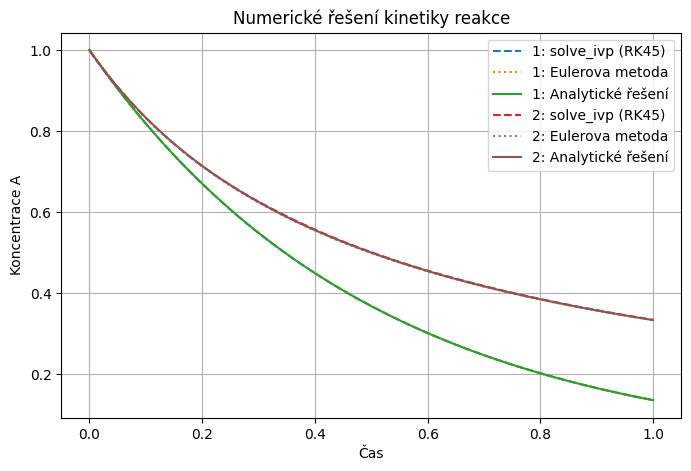

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definice rychlostn√≠ rovnice
def reaction1(t, A, k):
    return -k * A
def reaction2(t, A, k):
    return -k * A**2

# Poƒç√°teƒçn√≠ podm√≠nky
A0 = 1.0  # Poƒç√°teƒçn√≠ koncentrace reaktantu
k = 2    # Rychlostn√≠ konstanta

t_span = (0, 1)  # ƒåasov√Ω interval
num_points = 100  # Poƒçet bod≈Ø pro Eulerovu metodu
t_eval = np.linspace(t_span[0], t_span[1], num_points)

# Numerick√© ≈ôe≈°en√≠ pomoc√≠ solve_ivp
sol1 = solve_ivp(reaction1, t_span, [A0], args=(k,), t_eval=t_eval)
sol2 = solve_ivp(reaction2, t_span, [A0], args=(k,), t_eval=t_eval)

# Eulerova metoda
dt = (t_span[1] - t_span[0]) / num_points
t_euler = np.linspace(*t_span, num_points)
A_euler1 = np.zeros(num_points)
A_euler1[0] = A0
A_euler2 = np.zeros(num_points)
A_euler2[0] = A0

for i in range(1, num_points):
    A_euler1[i] = A_euler1[i-1] + reaction1(t_euler[i-1], A_euler1[i-1], k) * dt
    A_euler2[i] = A_euler2[i-1] + reaction2(t_euler[i-1], A_euler2[i-1], k) * dt

# Analytick√© ≈ôe≈°en√≠
A_analytical1 = A0 * np.exp(-k * t_eval)
A_analytical2 = A0/(1 + A0*k*t_eval)

# Grafick√© zn√°zornƒõn√≠
plt.figure(figsize=(8, 5))

plt.plot(sol1.t, sol1.y[0], label='1: solve_ivp (RK45)', linestyle='dashed')
plt.plot(t_euler, A_euler1, label='1: Eulerova metoda', linestyle='dotted')
plt.plot(t_eval, A_analytical1, label='1: Analytick√© ≈ôe≈°en√≠', linestyle='solid')

plt.plot(sol2.t, sol2.y[0], label='2: solve_ivp (RK45)', linestyle='dashed')
plt.plot(t_euler, A_euler2, label='2: Eulerova metoda', linestyle='dotted')
plt.plot(t_eval, A_analytical2, label='2: Analytick√© ≈ôe≈°en√≠', linestyle='solid')

plt.xlabel('ƒåas')
plt.ylabel('Koncentrace A')
plt.legend()
plt.title('Numerick√© ≈ôe≈°en√≠ kinetiky reakce')
plt.grid()
plt.show()


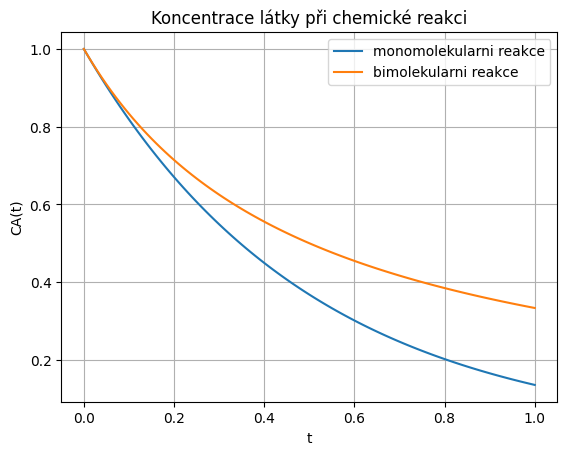

In [35]:
# Vykreslen√≠ analyticky
tmin=0
tmax=1
dt = 0.01
t = np.arange(tmin, tmax+dt, dt)

k = 2
CA0 = 1

f_mono = lambda t,k,CA0: CA0*np.exp(-k*t)
CA_mono = f_mono(t,k, CA0)

f_bi = lambda t,k,CA0: CA0/(1+CA0*k*t)
CA_bi = f_bi(t,k, CA0)

# Vizualizace
plt.plot(t, CA_mono, label="monomolekularni reakce")
plt.plot(t, CA_bi, label="bimolekularni reakce")

plt.title('Koncentrace l√°tky p≈ôi chemick√© reakci')
plt.xlabel('t')
plt.ylabel('CA(t)')
plt.grid()
plt.legend()
plt.show()

#### Biologick√Ω model - ≈°√≠≈ôen√≠ nemoc√≠ s konstantn√≠ infekƒçnost√≠


- Poƒçet nemocn√Ωch jedinc≈Ø $D$ roste s konstantn√≠ m√≠rou infekce $a$,
- ka≈æd√° infikovan√° osoba m√° konstantn√≠ pravdƒõpodobnost $b$, ≈æe se vyl√©ƒç√≠.

Zmƒõnu poƒçtu naka≈æen√Ωch osob lze popsat rovnic√≠
$$\frac{{\rm d}D}{{\rm d}t} = a-bD$$

kter√° m√° analytick√© ≈ôe≈°en√≠
$$D(t) = \frac{1}{b}\left( a- e^{-b(C+t)} \right)$$

kde $C = -\ln(a-bD(0))/b$ je integraƒçn√≠ konstanta. Model m√° d√°le rovnov√°≈æn√© ≈ôe≈°en√≠ ve tvaru
$$\frac{{\rm d}D}{{\rm d}t}=0 \rightarrow D_0 = \frac{a}{b}$$


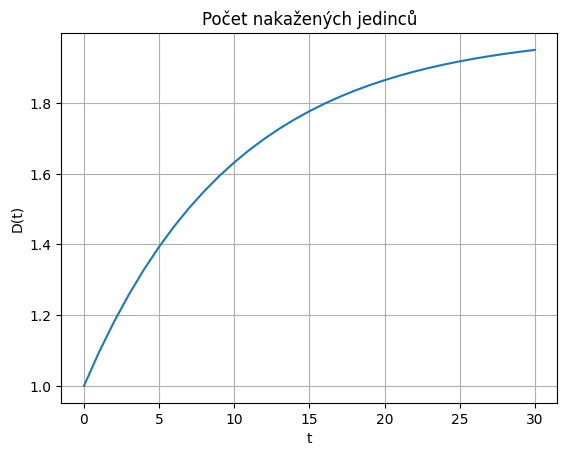

In [36]:
tmin=0
tmax=30
dt = 1

b = 0.1
a = 0.2
D0 = 1
C = -np.log(a-b*D0)/b

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,a,b,C: 1/b*(a-np.exp(-b*(C+t)))
D = f(t, a, b, C)

# Vizualizace
plt.plot(t, D)

plt.title('Poƒçet naka≈æen√Ωch jedinc≈Ø')
plt.xlabel('t')
plt.ylabel('D(t)')
plt.grid()
plt.show()

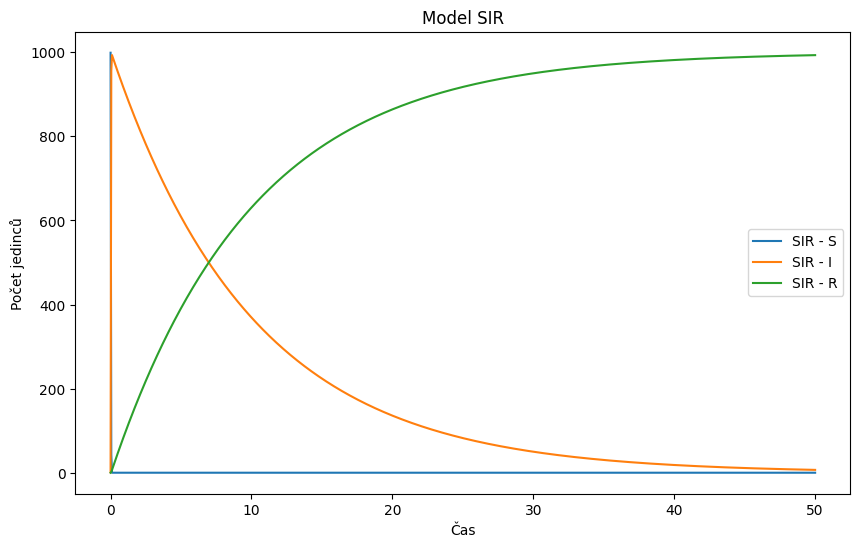

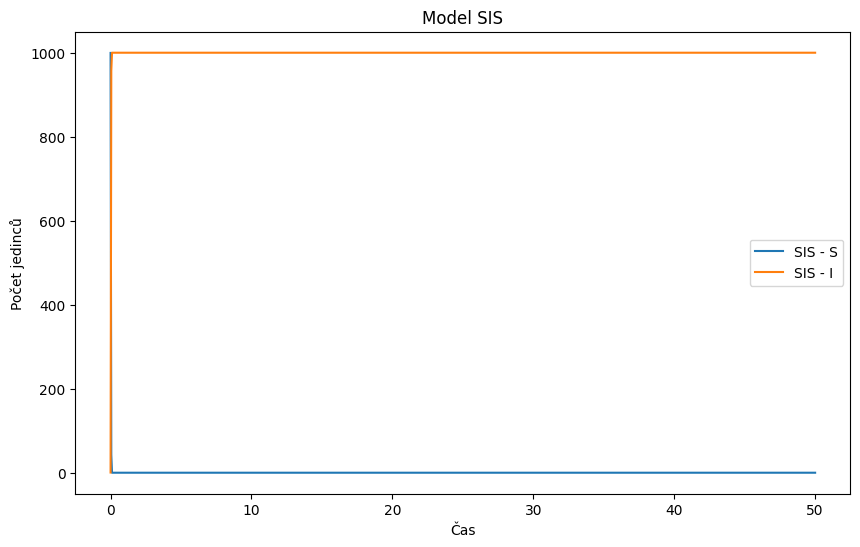

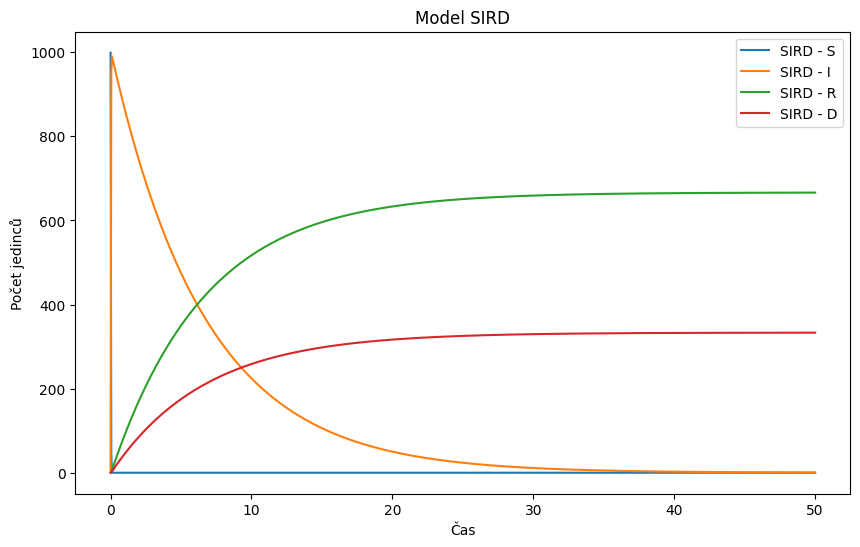

In [37]:
# numericky pomoc√≠ scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I                            # dS/dt = -Œ≤SI
    dIdt = beta * S * I - gamma * I                 # dI/dt = Œ≤SI - Œ≥I
    dRdt = gamma * I                                # dR/dt = Œ≥I
    return [dSdt, dIdt, dRdt]

def sis_model(t, y, beta, gamma):
    S, I = y
    dSdt = -beta * S * I + gamma * I                # dS/dt = -Œ≤SI + Œ≥I
    dIdt = beta * S * I - gamma * I                 # dI/dt = Œ≤SI - Œ≥I
    return [dSdt, dIdt]

def sird_model(t, y, beta, gamma, delta):
    S, I, R, D = y
    dSdt = -beta * S * I                            # dS/dt = -Œ≤SI
    dIdt = beta * S * I - gamma * I - delta * I     # dI/dt = Œ≤SI - Œ≥I - ŒºI
    dRdt = gamma * I                                # dR/dt = Œ≥I
    dDdt = delta * I                                # dD/dt = ŒºI
    return [dSdt, dIdt, dRdt, dDdt]

# Parametry model≈Ø
beta = 0.2          # parametr ≈°√≠≈ôen√≠ viru
gamma = 0.1         # parametr uzdravov√°n√≠
delta = 0.05        # parametr √∫mrt√≠ infikovan√Ωch
N = 1000            # poƒçet lid√≠
I0 = 1              # infikovan√Ωch v t=0
R0 = 0              # uzdraven√Ωch v t=0

# ≈òe≈°en√≠ model≈Ø SIR, SIS, SIRD, SIRDV
t_span = [0, 500]
t_eval = np.linspace(0, 50, 1000)

# SIR model
sol_sir = solve_ivp(sir_model, t_span, [N - I0, I0, R0], args=(beta, gamma), t_eval=t_eval)
S_sir, I_sir, R_sir = sol_sir.y

# SIS model
sol_sis = solve_ivp(sis_model, t_span, [N - I0, I0], args=(beta, gamma), t_eval=t_eval)
S_sis, I_sis = sol_sis.y

# SIRD model
sol_sird = solve_ivp(sird_model, t_span, [N - I0 - R0, I0, R0, 0], args=(beta, gamma, delta), t_eval=t_eval)
S_sird, I_sird, R_sird, D_sird = sol_sird.y

# Vykreslen√≠ v√Ωsledk≈Ø
plt.figure(figsize=(10, 6))
plt.plot(sol_sir.t, S_sir, label='SIR - S')
plt.plot(sol_sir.t, I_sir, label='SIR - I')
plt.plot(sol_sir.t, R_sir, label='SIR - R')
plt.xlabel('ƒåas')
plt.ylabel('Poƒçet jedinc≈Ø')
plt.title('Model SIR')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol_sis.t, S_sis, label='SIS - S')
plt.plot(sol_sis.t, I_sis, label='SIS - I')
plt.xlabel('ƒåas')
plt.ylabel('Poƒçet jedinc≈Ø')
plt.title('Model SIS')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol_sird.t, S_sird, label='SIRD - S')
plt.plot(sol_sird.t, I_sird, label='SIRD - I')
plt.plot(sol_sird.t, R_sird, label='SIRD - R')
plt.plot(sol_sird.t, D_sird, label='SIRD - D')
plt.xlabel('ƒåas')
plt.ylabel('Poƒçet jedinc≈Ø')
plt.title('Model SIRD')
plt.legend()
plt.show()

#### Ekonomick√Ω model - spot≈ôeba dom√°cnost√≠
Model m√° za c√≠l popsat v√Ωvoj spot≈ôeby dom√°cnost√≠ v z√°vislosti na m√≠≈ôe r≈Østu $k$ a ƒçasu, po kter√Ω k r≈Østu doch√°z√≠. 

R≈Øst je ovlivnƒõn zejm√©na v√Ωdaji na


- dlouhodobou spot≈ôebu (spot≈ôebiƒçe, n√°bytek atd.),
- kr√°tkodobou spot≈ôebu (potraviny, obleƒçen√≠ atd.),
- slu≈æby (n√°jem atd.)


Mƒõjme celkovou spot≈ôebu dom√°cnost√≠ $C$, kter√° roste v konstantn√≠ m√≠≈ôe 3 \%, tj. $k=0.03$, pot√© n√°sleduj√≠c√≠ rovnice popisuje v√Ωvoj spot≈ôeby v ƒçase $C^{\prime}$.

\begin{align*}
  \frac{C^{\prime}}{C} =& k \\
   \frac{{\rm d}C}{C} =& k{\rm d}t \\
   \ln |C| =& kt\\
   \textcolor{red}{C =}& \textcolor{red}{c\cdot e^{kt}}
\end{align*}

kde konstanta $c$ ud√°v√° m√≠ru r≈Østu.

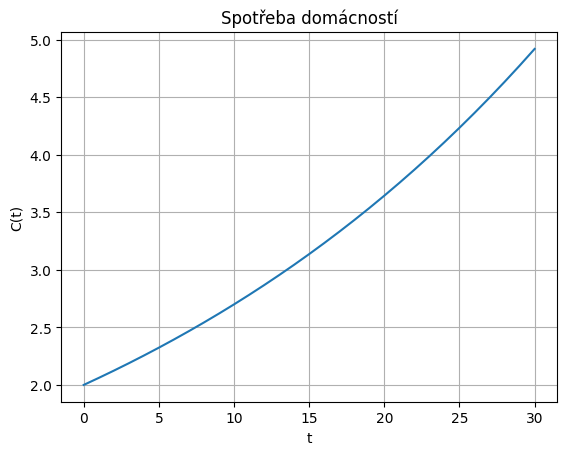

In [38]:
tmin=0
tmax=30
dt = 1

k = 0.03
c = 2

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,c,k: c*np.exp(k*t)
C = f(t, c, k)

# Vizualizace
plt.plot(t, C)

plt.title('Spot≈ôeba dom√°cnost√≠')
plt.xlabel('t')
plt.ylabel('C(t)')
plt.grid()
plt.show()

#### Cviƒçen√≠ - ODE 2. ≈ô√°du
<font color="green">Porovnejte p≈ôesn√° ≈ôe≈°en√≠ p≈ôedchoz√≠ho p≈ô√≠kladu s numerick√Ωm odhadem, nap≈ô√≠klad pomoc√≠ explicitn√≠ a implicitn√≠ Eulerovy metody.

Soustava rovnic m√° tvar
\begin{align*}
  y^{\prime} =& z(x)\\
  z^{\prime} =& \ln x
\end{align*}

a p≈ôesn√° ≈ôe≈°en√≠ maj√≠ pro jednotliv√© rovnice tvar

\begin{align*}
  y(x) =& \frac{x^2}{2} \left( \ln x - \frac{3}{2} \right)\\
  z(x) =& x\ln x -x + c
\end{align*}
</font>

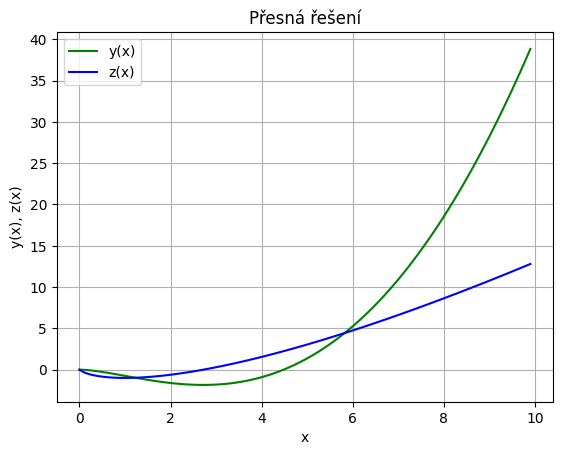

In [39]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0.0000000000001      # x > 0 kv≈Øli logaritmu
xmax = 10
dx = 0.1
x = np.arange(xmin, xmax, dx)

y = lambda x: x**2/2*(np.log(x)-3/2)
z = lambda x, c: x*np.log(x) - x + c

c = 0
# Vizualizace
plt.plot(x, y(x), 'g-', label="y(x)")
plt.plot(x, z(x, c), 'b-', label="z(x)")
plt.title('P≈ôesn√° ≈ôe≈°en√≠')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()

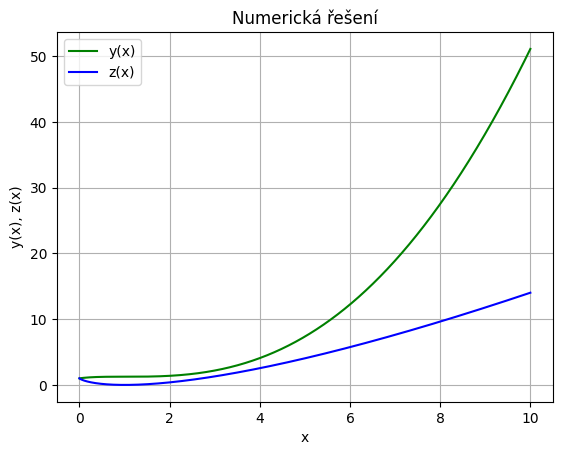

In [40]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0.0000000000001
xmax = 10
dx = 0.0001
x = np.arange(xmin, xmax, dx)
y = np.zeros(len(x))
z = np.zeros(len(x))

y[0] = 1
z[0] = 1

fy = lambda z: z
fz = lambda x: np.log(x)

for i in range(0, len(x) - 1):
    y[i+1] = y[i] + dx*fy(z[i])
    z[i+1] = z[i] + dx*fz(x[i])

plt.plot(x, y, 'g-', label='y(x)')
plt.plot(x, z, 'b-', label='z(x)')
plt.title('Numerick√° ≈ôe≈°en√≠')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()


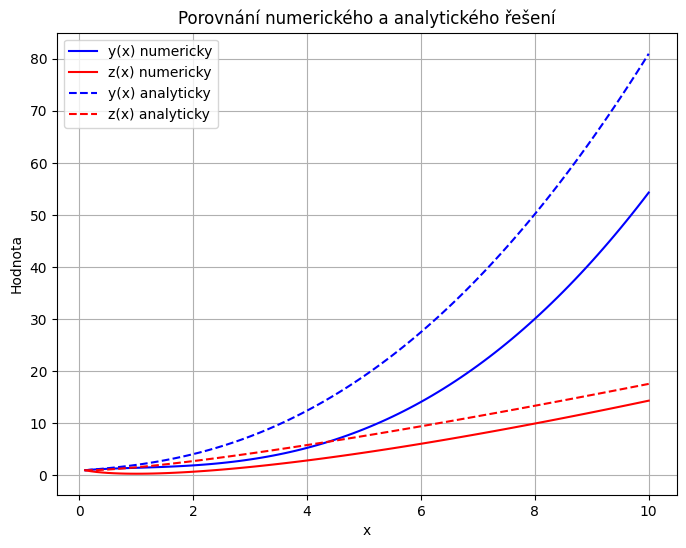

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definujeme diferenci√°ln√≠ rovnice
def system(x, Y):
    y, z = Y
    dydx = z
    dzdx = np.log(x)
    return [dydx, dzdx]

# Poƒç√°teƒçn√≠ podm√≠nky
x0 = 0.1
y0 = 1
z0 = 1
x_end = 10
x_span = (x0, x_end)
x_eval = np.linspace(x0, x_end, 100)

# Numerick√© ≈ôe≈°en√≠
sol = solve_ivp(system, x_span, [y0, z0], t_eval=x_eval)

# Analytick√° ≈ôe≈°en√≠ (odvozen√° d≈ô√≠ve)
C1 = y0 - (x0**2 * np.log(x0) / 4) - (x0**2 / 8) - x0
C2 = z0 - (x0 * np.log(x0) / 2) - (x0 / 2)

x_analytical = np.linspace(x0, x_end, 100)
y_analytical = (x_analytical**2 * np.log(x_analytical) / 4) + (x_analytical**2 / 8) + C1 + x_analytical
z_analytical = (x_analytical * np.log(x_analytical) / 2) + (x_analytical / 2) + C2

# Vykreslen√≠
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], 'b-', label='y(x) numericky')
plt.plot(sol.t, sol.y[1], 'r-', label='z(x) numericky')
plt.plot(x_analytical, y_analytical, 'b--', label='y(x) analyticky')
plt.plot(x_analytical, z_analytical, 'r--', label='z(x) analyticky')
plt.xlabel('x')
plt.ylabel('Hodnota')
plt.legend()
plt.title('Porovn√°n√≠ numerick√©ho a analytick√©ho ≈ôe≈°en√≠')
plt.grid()
plt.show()


#### Zombie apokalypsa

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html

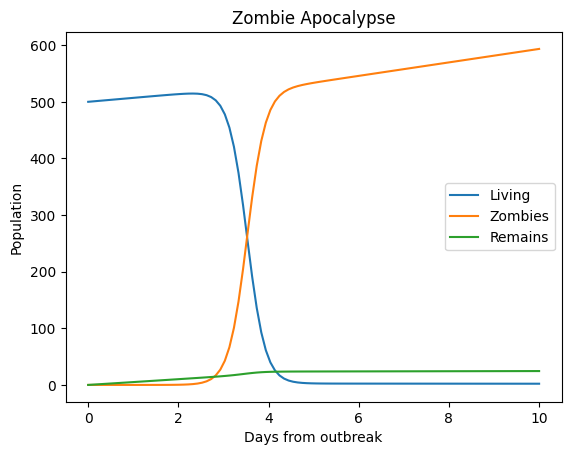

In [2]:
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import odeint


# solve the system dy/dt = f(y, t)
def f(y, t, paras):

    Si = y[0]                   # Aktu√°ln√≠ poƒçet ≈æiv√Ωch lid√≠ (n√°chyln√Ωch obƒõt√≠)
    Zi = y[1]                   # Aktu√°ln√≠ poƒçet zombie
    Ri = y[2]                   # Aktu√°ln√≠ poƒçet mrtv√Ωch

    try:
        P = paras['P'].value    # P M√≠ra porodnosti
        d = paras['d'].value    # d M√≠ra p≈ôirozen√© √∫mrtnosti (dennƒõ)
        B = paras['B'].value    # B M√≠ra p≈ôenosu (dennƒõ) - ≈æiv√° osoba se st√°v√° zombie
        G = paras['G'].value    # G M√≠ra o≈æiven√≠ (dennƒõ) - mrtv√Ω ƒçlovƒõk je vzk≈ô√≠≈°en do zombie
        A = paras['A'].value    # A M√≠ra zniƒçen√≠ (dennƒõ) - zombie zcela zniƒçena

    except:
        P, d, B, G, A = paras
        
    # the model equations (see Munz et al. 2009)
    dSdt = P - B*Si*Zi - d*Si             # dS/dt, zmƒõna populace ≈æiv√Ωch lid√≠
    # f0: zmƒõna populace ≈æiv√Ωch  v z√°vislosti na porodnosti (P), √∫mrtnosti (d) a interakci se zombiemi (B)

    dZdt = B*Si*Zi + G*Ri - A*Si*Zi       # dZ/dt, zmƒõna populace zombie
    # f1: zmƒõna populace zombie v z√°vislosti na interakci s ≈æiv√Ωmi lidmi a mrtv√Ωmi

    dRdt = d*Si + A*Si*Zi - G*Ri          # dR/dt, zmƒõna populace mrtv√Ωch
    # f2: zmƒõna populace mrtv√Ωch

    return [dSdt, dZdt, dRdt]


# Poƒç√°teƒçn√≠ podm√≠nky
S0 = 500.               # Poƒç√°teƒçn√≠ populace ≈æiv√Ωch lid√≠
Z0 = 0                  # Poƒç√°teƒçn√≠ populace zombie
R0 = 0                  # Poƒç√°teƒçn√≠ populace mrtv√Ωch
y0 = [S0, Z0, R0]       # Poƒç√°teƒçn√≠ stav syst√©mu
t = np.linspace(0, 10., 100)         # ƒåasov√° osa

P = 12      # M√≠ra porodnosti - birth rate
d = 0.01  # M√≠ra p≈ôirozen√© √∫mrtnosti (dennƒõ) - natural death percent (per day)
B = 0.0095  # M√≠ra p≈ôenosu (dennƒõ) - transmission percent  (per day)
G = 0.0001  # M√≠ra o≈æiven√≠ (dennƒõ) - resurect percent (per day)
A = 0.0001  # M√≠ra zniƒçen√≠ (dennƒõ) - destroy percent  (per day)

# ≈òe≈°en√≠ ODE
soln = odeint(f, y0, t, args=((P, d, B, G, A), ))
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Vizualizace
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Remains')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse')      #  - No Init. Dead Pop.; No New Births.
plt.legend(loc=0)
plt.show()


#### P≈ô√≠klad
Prolo≈æen√≠ k≈ôivky vygenerovan√Ωmi body
- vezmeme k≈ôivku z minul√©ho p≈ô√≠kladu
- omez√≠me se na urƒçit√Ω poƒçet bod≈Ø
- body n√°hodnƒõ p≈ôem√≠st√≠me

In [ ]:
!python -m pip install lmfit
# pro optimalizaci a fitting, usnad≈àuje pr√°ci s parametry model≈Ø

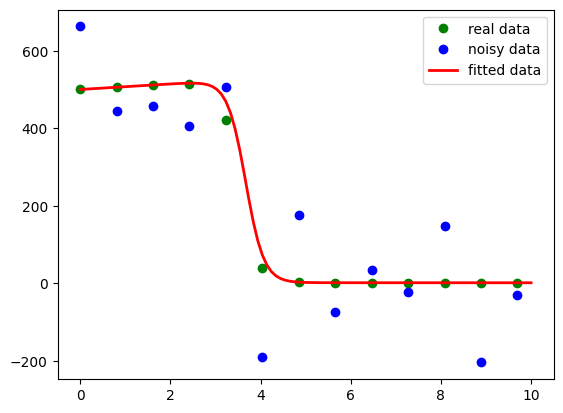

In [ ]:
# Vezmeme pr≈Øbƒõh poƒçtu ≈æiv√Ωch (S)
from lmfit import minimize, Parameters, Parameter, report_fit
# ≈òe≈°en√≠ syst√©mu ODE s poƒç√°teƒçn√≠mi podm√≠nkami (x0) a parametry modelu (paras)
# Vrac√≠ ƒçasov√Ω v√Ωvoj populac√≠
def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,p) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x

# Residuum pro fitov√°n√≠
# Poƒç√≠t√° rozd√≠l mezi namƒõ≈ôen√Ωmi daty a modelem
# Pou≈æ√≠v√° se p≈ôi optimalizaci parametr≈Ø modelu
def residual(paras, t, data):
    x0 = paras['S0'].value, paras['Z0'].value, paras['R0'].value
    model = g(t, x0, paras)
    s_model = model[:, 0]
    return (s_model - data).ravel()

np.random.seed(1)       # kv≈Øli reprodukovatelnosti


# Generov√°n√≠ fale≈°n√Ωch dat
S_real = S[0::8]        # vybereme ka≈æd√Ω osm√Ω prvek od poƒç√°teƒçn√≠ho indexu do konce (horn√≠ mez nespecifikov√°na)
S_measured = S_real + np.random.randn(len(S_real)) * 100
t_measured = t[0::8]

plt.figure()
plt.plot(t_measured, S_real, 'o', color='g', label='real data')

# P≈ôid√°n√≠ ≈°umu do dat pro simulaci mƒõ≈ôic√≠ch chyb
# Simuluj√≠ realistick√© testov√°n√≠ modelu
plt.plot(t_measured, S_measured, 'o', color='b', label='noisy data')

# Nastaven√≠ parametr≈Ø pro fitov√°n√≠
# poƒç√°teƒçn√≠ hodnoty a meze pro parametry modelu
# mo≈æno zafixovat (vary=False)
params = Parameters()
params.add('S0', value=S0, min=490., max=510.)
params.add('Z0', value=Z0, vary=False)
params.add('R0', value=R0, vary=False)
params.add('P', value=10, min=8., max=12.)
params.add('d', value=0.0005, min=0.00001, max=0.005)
params.add('B', value=0.01, min=0.00001, max=0.01)
params.add('G', value=G, vary=False)
params.add('A', value=0.0005, min=0.00001, max=0.001)

# Fit model
# metoda nejmen≈°√≠ch ƒçtverc≈Ø k minimalizaci rozd√≠l≈Ø mezi modelem a namƒõ≈ôen√Ωmi daty
result = minimize(residual, params, args=(t_measured, S_measured), method='leastsq')  # leastsq
# Kontrola v√Ωsledk≈Ø fitov√°n√≠
data_fitted = g(t, y0, result.params)

plt.plot(t, data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()

plt.show()

In [3]:
# Zobrazit statistiky fitov√°n√≠
report_fit(result)


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 13
    # variables        = 5
    chi-square         = 226488.218
    reduced chi-square = 28311.0273
    Akaike info crit   = 136.951485
    Bayesian info crit = 139.776232
[[Variables]]
    S0:  492.187256 +/- 136.611106 (27.76%) (init = 500)
    Z0:  0 (fixed)
    R0:  0 (fixed)
    P:   9.31965995 +/- 154.246009 (1655.06%) (init = 10)
    d:   0.00423009 +/- 0.17358506 (4103.58%) (init = 0.0005)
    B:   0.00979490 +/- 0.00437867 (44.70%) (init = 0.01)
    G:   0.0001 (fixed)
    A:   3.3836e-04 +/- 0.03032238 (8961.55%) (init = 0.0005)
[[Correlations]] (unreported correlations are < 0.100)
    C(d, A)  = +0.9914
    C(P, d)  = +0.8713
    C(B, A)  = -0.8407
    C(P, A)  = +0.8359
    C(d, B)  = -0.7732
    C(S0, P) = -0.6118
    C(P, B)  = -0.5216
    C(S0, d) = -0.2830
    C(S0, A) = -0.2313


#### Stochastick√© diferenci√°ln√≠ rovnice (SDR)

nap≈ô. model Black-Scholes pro ceny akci√≠:
$$dS_t=Œº S_t dt+œÉ S_t dW_t$$


kde
- $S_t$‚Äã ... cena akcie v ƒçase $t$
- $Œº$ ..... oƒçek√°van√Ω v√Ωnos
- $œÉ$ ..... volatilita
- $W_t$‚Äã ... Brown≈Øv pohyb

Numerick√° aproximace pomoc√≠ Euler-Maruyama sch√©matu:
$$S_{t+Œît}=S_t+ŒºS_tŒît+œÉS_tŒîW_t$$


kde $ŒîW_t$‚Äã je norm√°ln√≠ n√°hodn√° veliƒçina $N(0,Œît)$

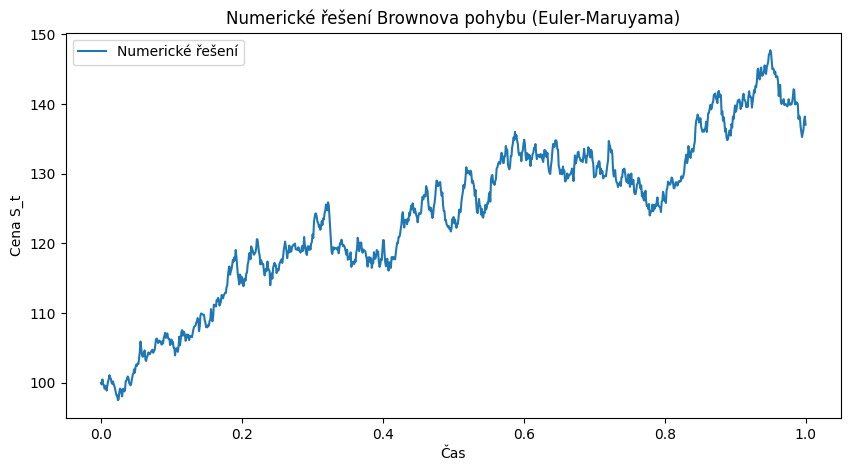

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry modelu
mu = 0.1     # Drift (st≈ôedn√≠ r≈Øst)
sigma = 0.2  # Volatilita
T = 1.0      # Celkov√Ω ƒças
N = 1000     # Poƒçet ƒçasov√Ωch krok≈Ø
dt = T / N   # Velikost ƒçasov√©ho kroku
S0 = 100     # Poƒç√°teƒçn√≠ hodnota

# Inicializace vektoru pro S_t
t = np.linspace(0, T, N)
S = np.zeros(N)
S[0] = S0

# Simulace Wienerova procesu (dW ~ N(0, dt))
dW = np.random.normal(scale=np.sqrt(dt), size=N-1)

# Euler-Maruyama sch√©ma
for i in range(1, N):
    S[i] = S[i-1] + mu * S[i-1] * dt + sigma * S[i-1] * dW[i-1]

# Vykreslen√≠ v√Ωsledku
plt.figure(figsize=(10, 5))
plt.plot(t, S, label="Numerick√© ≈ôe≈°en√≠")
plt.xlabel("ƒåas")
plt.ylabel("Cena S_t")
plt.title("Numerick√© ≈ôe≈°en√≠ Brownova pohybu (Euler-Maruyama)")
plt.legend()
plt.show()


Analytick√© ≈ôe≈°en√≠ pomoc√≠ It√¥ova lemmatu

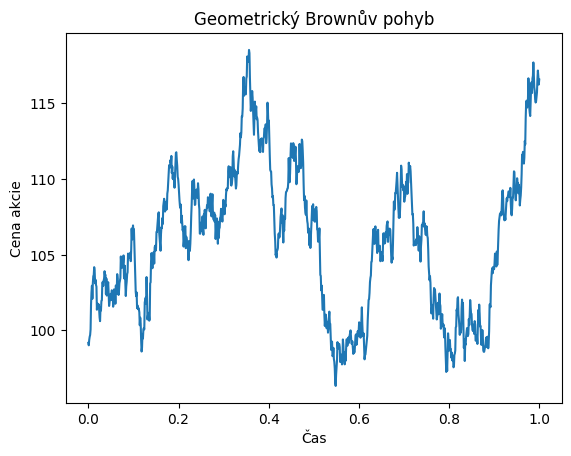

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
T = 1.0         # ƒçasov√Ω horizont (rok)
N = 1000        # poƒçet krok≈Ø
dt = T / N      # velikost kroku
mu = 0.1        # drift (pr≈Ømƒõrn√Ω r≈Øst)
sigma = 0.2     # volatilita
S0 = 100        # poƒç√°teƒçn√≠ cena

# Generov√°n√≠ Brownova pohybu
t = np.linspace(0, T, N)
W = np.random.normal(scale=np.sqrt(dt), size=N).cumsum()
# ≈ôe≈°en√≠ pomoc√≠ It√¥ova lemmatu
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
# S‚Äã m√° lognorm√°ln√≠ rozdƒõlen√≠

# Graf
plt.plot(t, S)
plt.xlabel("ƒåas")
plt.ylabel("Cena akcie")
plt.title("Geometrick√Ω Brown≈Øv pohyb")
plt.show()
